# Infilling Human Antibody Sequences using Sapiens

Try out this notebook in your browser: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Merck/Sapiens/main?labpath=notebooks%2F01_sapiens_antibody_infilling.ipynb)

In [1]:
import sapiens

## Infilling an antibody sequence

Positions marked with * or X will be infilled with the most likely human residues, given the rest of the sequence

In [2]:
seq = '**QLV*SGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDYRFDMGFDYWGQGTTVTVSS'

print(seq)
print(sapiens.predict_masked(seq, 'H'))# H or L for Heavy or Light (kappa and lambda are using the same model)
print()

2022-12-31 16:58:59 | INFO | fairseq.file_utils | loading archive file /Users/joseph/miniforge3/envs/test_env/lib/python3.10/site-packages/sapiens/models/v1
2022-12-31 16:58:59 | INFO | fairseq.file_utils | loading archive file /Users/joseph/miniforge3/envs/test_env/lib/python3.10/site-packages/sapiens/models/v1


**QLV*SGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDYRFDMGFDYWGQGTTVTVSS


2022-12-31 16:59:02 | INFO | fairseq.tasks.masked_lm | dictionary: 24 types
2022-12-31 16:59:02 | INFO | fairseq.models.roberta.model | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 1000, 'log_format': 'simple', 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': 'data/models/human_heavy_chain_by_year/seq_random20M/13_unmasked_700epochs/tensorboard', 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': True, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': 'bin/fairseq_plugins', 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size'

QVQLVQSGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDYRFDMGFDYWGQGTTVTVSS





Predictions can even be made in CDR3 regions

In [3]:
seq = 'QVLQVESGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDY*****FDYWGQGTTVTVSS'

print(seq)
print(sapiens.predict_masked(seq, 'H'))
print()

QVLQVESGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDY*****FDYWGQGTTVTVSS
QVLQVESGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDYGDSGYFDYWGQGTTVTVSS



Use `predict_best_score` to humanize all positions, not just masks:

In [4]:
seq = 'QVLQVESGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDY*****FDYWGQGTTVTVSS'

print(seq)
print(sapiens.predict_best_score(seq, 'H'))
print()

QVLQVESGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDY*****FDYWGQGTTVTVSS
QVQLVQSGAEVKKPGASVKVSCKASGYTFTNYYMHWVRQAPGQGLEWMGWINPSNGGTNFAQKFQGRVTLTTDTSTTTAYMELRSLRSDDTAVYYCARRDYGDSGYFDYWGQGTLVTVSS



Hundreds of sequences per second can be processed:

In [5]:
%%timeit

sapiens.predict_masked(
    '******SGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDY*****FDYWGQGTTVTVSS',
    'H'  # H or L (kappa and lambda are using the same model)
)

8.31 ms ± 2.57 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Suggesting mutations

Scores are given both for residues that are masked and that are present.  
When inputting a non-human antibody sequence, the output scores can be used for humanization.

In [6]:
scores = sapiens.predict_scores(
    '**QLV*SGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDYRFDMGFDYWGQGTTVTVSS',
    'H'
)
scores

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,0.003272,0.004147,0.004011,0.004590,0.003507,0.003483,0.007521,0.003804,0.004284,0.004978,0.003418,0.003623,0.004879,0.901278,0.004117,0.004107,0.003797,0.004005,0.003672,0.003884
1,0.012038,0.003854,0.006803,0.008174,0.005015,0.020478,0.004143,0.006631,0.004179,0.012100,0.018134,0.003898,0.003622,0.004246,0.004593,0.003540,0.003890,0.845837,0.005030,0.003962
2,0.003384,0.003895,0.003726,0.004068,0.003433,0.003618,0.006562,0.003634,0.004426,0.005160,0.003974,0.003871,0.005339,0.903203,0.005618,0.003134,0.003632,0.003113,0.003878,0.003747
3,0.004612,0.005325,0.004443,0.004641,0.003994,0.003958,0.004332,0.003668,0.004861,0.892500,0.004669,0.004339,0.004357,0.004572,0.005262,0.004044,0.004197,0.005771,0.004786,0.003905
4,0.005519,0.003664,0.003555,0.005269,0.003845,0.005574,0.004062,0.004039,0.003678,0.006896,0.006317,0.003256,0.003747,0.003235,0.003358,0.002785,0.003174,0.901717,0.004030,0.003385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.004287,0.003619,0.004675,0.003547,0.004306,0.004574,0.004084,0.006994,0.003735,0.004743,0.003875,0.003612,0.003914,0.004089,0.003705,0.003789,0.003683,0.901924,0.003869,0.003699
116,0.005987,0.003938,0.003747,0.003728,0.004253,0.003697,0.003550,0.009827,0.003333,0.003600,0.003571,0.004205,0.004117,0.004035,0.003337,0.006825,0.896746,0.004605,0.003367,0.004025
117,0.005059,0.003956,0.005118,0.003502,0.004327,0.005373,0.004479,0.005199,0.004158,0.003801,0.003921,0.003922,0.003977,0.004165,0.004017,0.003586,0.003528,0.899429,0.004096,0.003767
118,0.005215,0.003985,0.004292,0.003955,0.004738,0.003779,0.004141,0.003889,0.003863,0.003889,0.004158,0.004122,0.004551,0.003929,0.003866,0.899066,0.005277,0.003881,0.004002,0.004915


### Visualizing suggested mutations

In [ ]:
!pip install seaborn

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
def visualize_scores(sequence, chain_type):
    preds = sapiens.predict_scores(sequence, chain_type)
    sns.set(rc={'figure.figsize':(12, 24)})
    labels = [f"{i}: {pos}" for i, pos in enumerate(sequence)]
    p = sns.heatmap(preds, yticklabels=labels, cmap="mako")
    p.xaxis.tick_top()

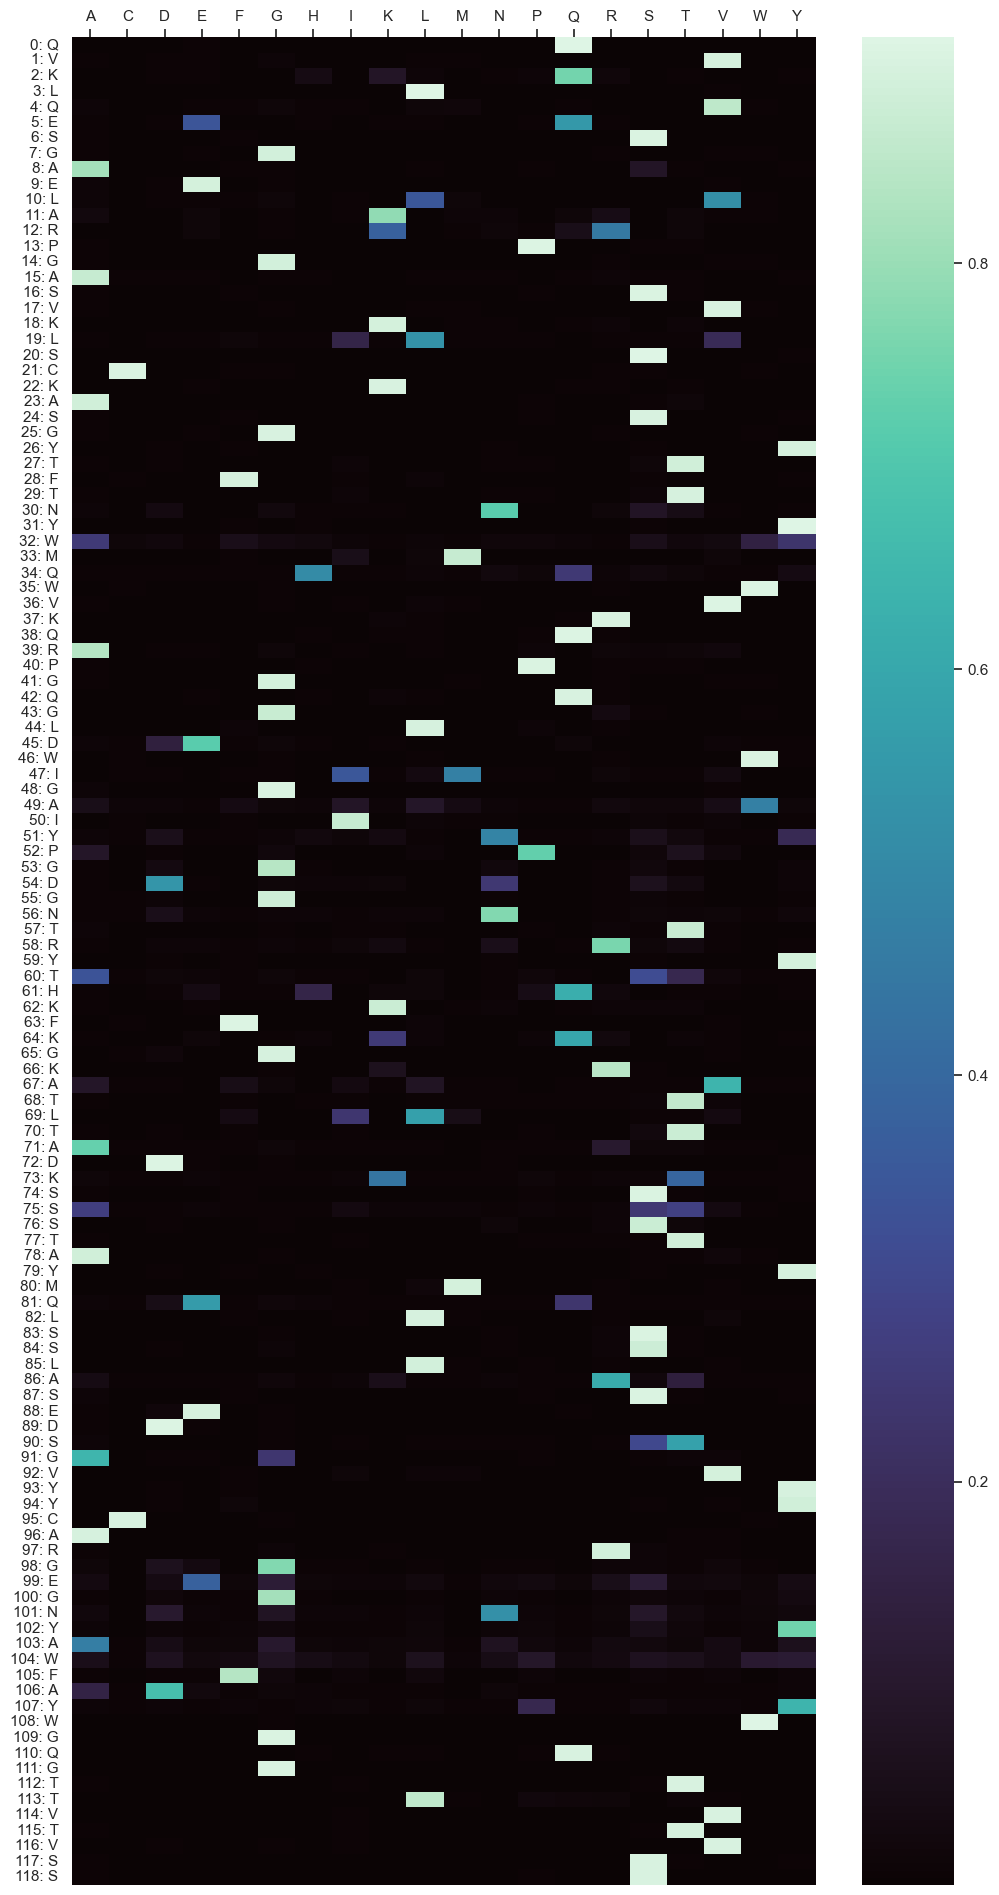

In [9]:
visualize_scores(
    'QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLDWIGAIYPGDGNTRYTHKFKGKATLTADKSSSTAYMQLSSLASEDSGVYYCARGEGNYAWFAYWGQGTTVTVSS',
    'H'
)

Show only the five most probable residues for each position:

In [10]:
def visualize_top_five(sequence, chain_type, offset=0, length=15):
    preds = sapiens.predict_scores(sequence, chain_type)
    preds.index = list(sequence)
    
    numbers = preds.T.reset_index(drop=True).T
    numbers = numbers.apply(lambda row: pd.Series(row.sort_values(ascending=False).values, row.index), axis=1)
    numbers.columns = numbers.columns + 1
    
    annot = preds.apply(lambda row: (row.sort_values(ascending=False).index + '\n' + row.sort_values(ascending=False).apply('{:.1%}'.format)).reset_index(drop=True), axis=1)
    annot.columns = annot.columns + 1
    
    fig, ax = plt.subplots(figsize=(16, 3))
    sns.heatmap(numbers.iloc[offset:length + offset,:5].T, annot=annot.iloc[offset:length + offset,:5].T, fmt='s', ax=ax, robust=True, vmax=1, vmin=0, cmap='Greens', cbar_kws={'label': 'Probability'});
    for i in range(length):
        ax.axvline(i, color='white', lw=5)
    ax.set_ylabel('Top predictions');
    ax.xaxis.tick_top()
    plt.xticks(rotation=0, fontsize=15);

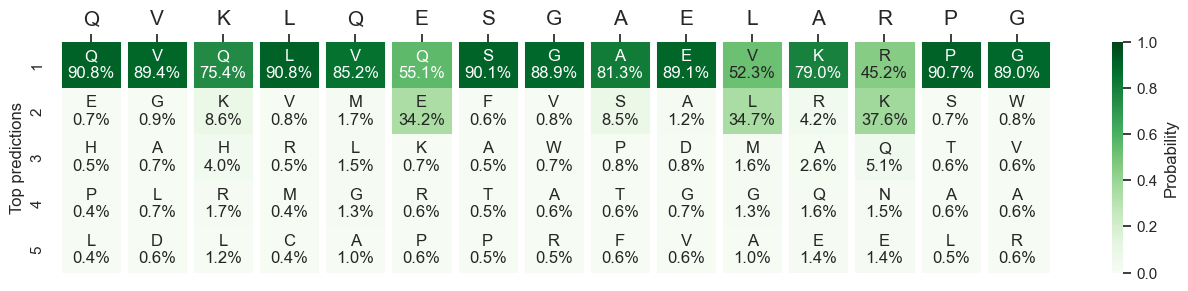

In [11]:
visualize_top_five(
    'QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLDWIGAIYPGDGNTRYTHKFKGKATLTADKSSSTAYMQLSSLASEDSGVYYCARGEGNYAWFAYWGQGTTVTVSS', 
    'H',
    offset=0, 
    length=15
)

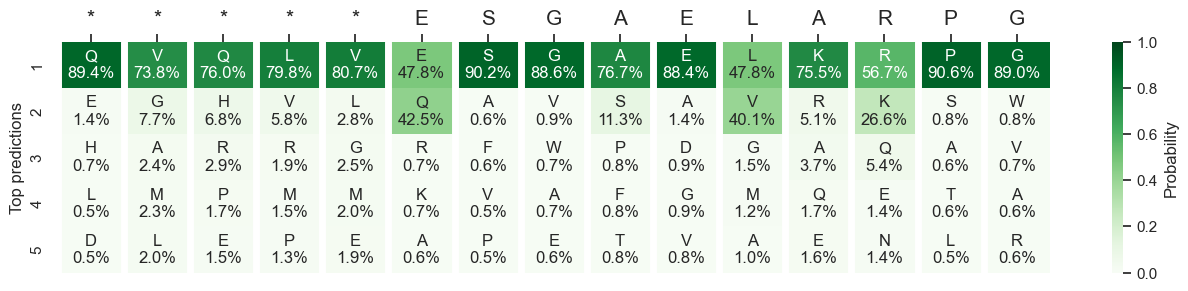

In [12]:
visualize_top_five(
    '*****ESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLDWIGAIYPGDGNTRYTHKFKGKATLTADKSSSTAYMQLSSLASEDSGVYYCARGEGNYAWFAYWGQGTTVTVSS', 
    'H',
    offset=0, 
    length=15
)

In [13]:
def visualize_top_five_vertical(sequence, chain_type):
    preds = sapiens.predict_scores(sequence, chain_type)
    preds.index = list(sequence)
    
    numbers = preds.T.reset_index(drop=True).T
    numbers = numbers.apply(lambda row: pd.Series(row.sort_values(ascending=False).values, row.index), axis=1)
    numbers.columns = numbers.columns + 1
    
    annot = preds.apply(lambda row: (row.sort_values(ascending=False).index + '   ' + row.sort_values(ascending=False).apply('{:.1%}'.format)).reset_index(drop=True), axis=1)
    annot.columns = annot.columns + 1
    
    fig, ax = plt.subplots(figsize=(8, 35))
    sns.heatmap(numbers.iloc[:,:5], annot=annot.iloc[:,:5], fmt='s', ax=ax, robust=True, vmax=0.5, cmap='Greens');
    plt.yticks(rotation=0, fontsize=13);

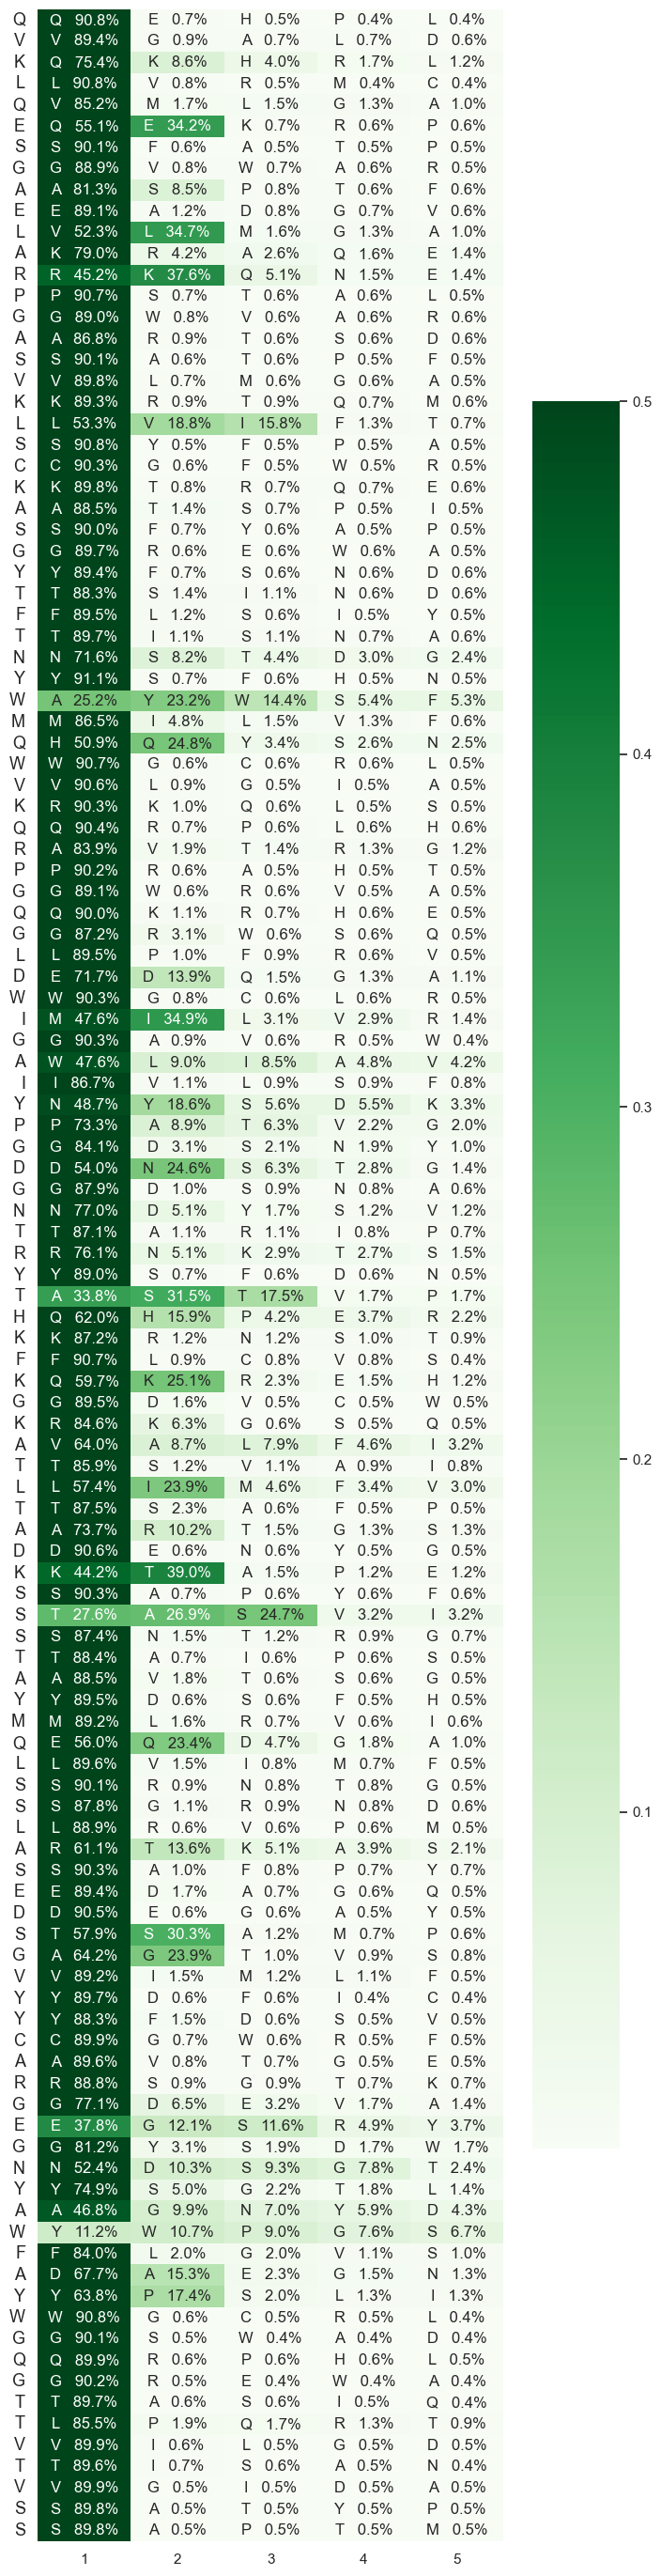

In [14]:
visualize_top_five_vertical(
    'QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLDWIGAIYPGDGNTRYTHKFKGKATLTADKSSSTAYMQLSSLASEDSGVYYCARGEGNYAWFAYWGQGTTVTVSS', 
    'H'
)

## Evaluating infill accuracy on TheraSAbDab

In [15]:
import sys
from os import path

In [16]:
!wget -O TheraSAbDab.csv http://opig.stats.ox.ac.uk/webapps/newsabdab/static/downloads/TheraSAbDab_SeqStruc_OnlineDownload.csv

--2022-12-31 17:00:17--  http://opig.stats.ox.ac.uk/webapps/newsabdab/static/downloads/TheraSAbDab_SeqStruc_OnlineDownload.csv
Resolving opig.stats.ox.ac.uk (opig.stats.ox.ac.uk)... 163.1.32.58
Connecting to opig.stats.ox.ac.uk (opig.stats.ox.ac.uk)|163.1.32.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 410568 (401K) [text/csv]
Saving to: ‘TheraSAbDab.csv’

TheraSAbDab.csv     100%[===================>] 400.95K   564KB/s    in 0.7s    

2022-12-31 17:00:18 (564 KB/s) - ‘TheraSAbDab.csv’ saved [410568/410568]



In [17]:
thera = pd.read_csv("TheraSAbDab.csv")
thera.head()

,Therapeutic,Format,CH1 Isotype,VD LC,Highest_Clin_Trial (Aug '22),Est. Status,Heavy Sequence,Light Sequence,Heavy Sequence (if bispec),Light Sequence (if bispec),...,95-98% SI Structure,Year Proposed,Year Recommended,Target,Companies,Conditions Approved,Conditions Active,Conditions Discontinued,Development Tech,Notes
0,Abagovomab,Whole mAb,G1,Kappa,Phase-III,Discontinued,QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLD...,DIELTQSPASLSASVGETVTITCQASENIYSYLAWHQQKQGKSPQL...,na,na,...,None,2006,2007,CA125,Menarini,na,na,Ovarian cancer;Pancreatic cancer,na,NaN
1,Abciximab,Fab,G1,Kappa,Approved,NFD,EVQLQQSGTVLARPGASVKMSCEASGYTFTNYWMHWVKQRPGQGLE...,EIVLTQSPVTLSVTPGDSVSLSCRASRDISNNLHWFQQTSHESPRL...,na,na,...,None,1993,1994,CD41_CD61,Janssen Biologics BV;Eli Lilly,Coronary artery restenosis;Unstable angina pec...,na,Arterial occlusive disorders;Myocardial infarc...,na,Sequence sourced through DrugBank.
2,Abelacimab,Whole mAb,G1,Lambda,Phase-III,Active,QVQLLESGGGLVQPGGSLRLSCAASGFTFSTAAMSWVRQAPGKGLE...,QSVLTQPPSASGTPGQRVTISCSGSSSNIGSNDVSWYQQLPGTAPK...,na,na,...,6r8x:CB,2018,2019,F11,Novartis;Anthos Therapeutics;Labcorp Drug Deve...,na,Venous Thromboembolism; Stroke;Thrombosis,na,na,(Feb '22) Added in missing residues 97 and 98....
3,Abituzumab,Whole mAb,G2,Kappa,Phase-II,Active,QVQLQQSGGELAKPGASVKVSCKASGYTFSSFWMHWVRQAPGQGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDISNYLAWYQQKPGKAPKL...,na,na,...,None,2013,2014,ITGAV,Merck,na,Colorectal cancer;Systemic scleroderma,Ovarian cancer;Prostate cancer;Solid tumours,na,"4o02 claims to be abituzumab (17E6), but is not"
4,Abrezekimab,Fab,G1,Kappa,Phase-I,Discontinued,QVTLKESGPVLVKPTETLTLTCTVSGFSLTNYHVQWIRQPPGKALE...,DIQMTQSPSSLSASVGDRVTITCLASEDISNYLAWYQQKPGKAPKL...,na,na,...,None,2017,2018,IL13,UCB,na,na,Asthma,na,(Jun '22) Added missing FWH3 and CDRL3 residues


In [21]:
def infill_sequence_pos(positions, sequence, chain_type):
    """Mask the residues given by positions and perform infilling."""
    list_seq = list(sequence)
    for pos in positions:
        list_seq[pos] = "*"
    query_seq = "".join(list_seq)
    return sapiens.predict_masked(query_seq, chain_type)

In [22]:
def get_mean_infill_accuracy(sequence, chain_type):
    """Mask each position in the sequence individually and return the accuracy of infilling the original residue."""
    correct = 0
    for i in range(len(sequence)):
        filled = infill_sequence_pos([i], sequence, chain_type)
        if filled == sequence:
            correct += 1
    return correct / len(sequence)

In [23]:
get_mean_infill_accuracy(
    "QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLDWIGAIYPGDGNTRYTHKFKGKATLTADKSSSTAYMQLSSLASEDSGVYYCARGEGNYAWFAYWGQGTTVTVSS", 
    "H"
)

0.6218487394957983

In [24]:
def suffix_class(name):
    if name.endswith("zumab"):
        return "zumab"
    if name.endswith("umab"):
        return "umab"
    if name.endswith("imab"):
        return "imab"
    return None

In [25]:
thera["suffix"] = thera["Therapeutic"].apply(suffix_class)

In [26]:
%%time

# Apply infilling to each heavy sequence and get average accuracy
thera["Accuracy heavy"] = thera["Heavy Sequence"].apply(lambda x: get_mean_infill_accuracy(x, "H"))

CPU times: user 14min 13s, sys: 5min 55s, total: 20min 8s
Wall time: 13min 53s


In [27]:
thera.head()

,Therapeutic,Format,CH1 Isotype,VD LC,Highest_Clin_Trial (Aug '22),Est. Status,Heavy Sequence,Light Sequence,Heavy Sequence (if bispec),Light Sequence (if bispec),...,Year Recommended,Target,Companies,Conditions Approved,Conditions Active,Conditions Discontinued,Development Tech,Notes,suffix,Accuracy heavy
0,Abagovomab,Whole mAb,G1,Kappa,Phase-III,Discontinued,QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLD...,DIELTQSPASLSASVGETVTITCQASENIYSYLAWHQQKQGKSPQL...,na,na,...,2007,CA125,Menarini,na,na,Ovarian cancer;Pancreatic cancer,na,NaN,None,0.621849
1,Abciximab,Fab,G1,Kappa,Approved,NFD,EVQLQQSGTVLARPGASVKMSCEASGYTFTNYWMHWVKQRPGQGLE...,EIVLTQSPVTLSVTPGDSVSLSCRASRDISNNLHWFQQTSHESPRL...,na,na,...,1994,CD41_CD61,Janssen Biologics BV;Eli Lilly,Coronary artery restenosis;Unstable angina pec...,na,Arterial occlusive disorders;Myocardial infarc...,na,Sequence sourced through DrugBank.,imab,0.627119
2,Abelacimab,Whole mAb,G1,Lambda,Phase-III,Active,QVQLLESGGGLVQPGGSLRLSCAASGFTFSTAAMSWVRQAPGKGLE...,QSVLTQPPSASGTPGQRVTISCSGSSSNIGSNDVSWYQQLPGTAPK...,na,na,...,2019,F11,Novartis;Anthos Therapeutics;Labcorp Drug Deve...,na,Venous Thromboembolism; Stroke;Thrombosis,na,na,(Feb '22) Added in missing residues 97 and 98....,imab,0.893443
3,Abituzumab,Whole mAb,G2,Kappa,Phase-II,Active,QVQLQQSGGELAKPGASVKVSCKASGYTFSSFWMHWVRQAPGQGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDISNYLAWYQQKPGKAPKL...,na,na,...,2014,ITGAV,Merck,na,Colorectal cancer;Systemic scleroderma,Ovarian cancer;Prostate cancer;Solid tumours,na,"4o02 claims to be abituzumab (17E6), but is not",zumab,0.737288
4,Abrezekimab,Fab,G1,Kappa,Phase-I,Discontinued,QVTLKESGPVLVKPTETLTLTCTVSGFSLTNYHVQWIRQPPGKALE...,DIQMTQSPSSLSASVGDRVTITCLASEDISNYLAWYQQKPGKAPKL...,na,na,...,2018,IL13,UCB,na,na,Asthma,na,(Jun '22) Added missing FWH3 and CDRL3 residues,imab,0.750000


In [56]:
# Accuracies of infilling by antibody suffix
thera.groupby("suffix").mean()["Accuracy heavy"]

suffix
imab     0.801706
umab     0.894173
zumab    0.789134
Name: Accuracy heavy, dtype: float64

In [57]:
%%time

# Repeat for light sequences
thera["Accuracy light"] = thera["Light Sequence"].apply(lambda x: get_mean_infill_accuracy(x, "L"))

CPU times: user 13min, sys: 1min 5s, total: 14min 6s
Wall time: 12min 22s


In [58]:
thera.groupby("suffix").mean()["Accuracy light"]

suffix
imab     0.816544
umab     0.939837
zumab    0.799526
Name: Accuracy light, dtype: float64